In [42]:
import matplotlib.pylab as plt   # That gives plotting, and the next line makes plots appear inline in notebook
%matplotlib inline 
plt.rcParams['figure.dpi']=300

import numpy as np  # That gives numerical arrays and tools for manipulating them

#### Define tuning curves

In [43]:
def gaussian(mu,sigma, x):   
    maxrate = 300 # max firing rate
    f = maxrate*np.exp(-0.5*((x-mu)/sigma)**2)
    return f

def cockroach_tuning(stim_dir, cell_num):
    
    if cell_num == 1:
        mu = 45
        sigma = 5
        f = gaussian(mu, sigma, stim_dir)
    elif cell_num == 2:
        mu = 45
        sigma = 10
        f = gaussian(mu, sigma, stim_dir) 
    else:
        mu = 30
        sigma = 10
        f1 = gaussian(mu, sigma, stim_dir)
        mu = 60
        f2 = gaussian(mu, sigma, stim_dir)
        f = (f1 + f2)

    return f

# Enter stimulus direction (in degrees) and cell number here

In [81]:
stimDir=80
cell_num=1

# Enter number of trials (ntrials), and duration of each trial (nmsec) here

In [82]:
ntrials=10
nmsec = 300    # number of milliseconds to record for

### Generate spike train

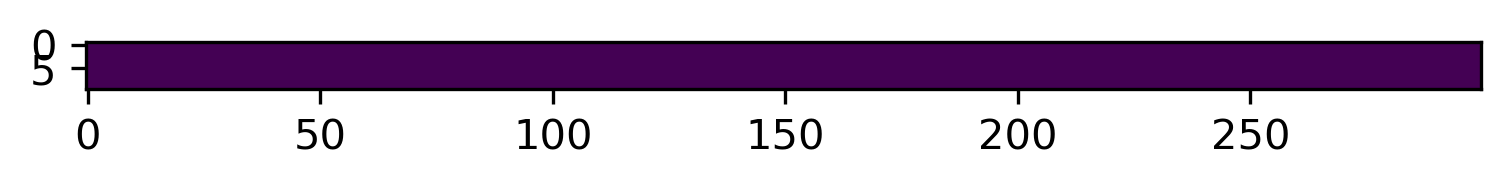

In [83]:
times=np.arange(nmsec) #array of time points (1 msec apart)
spiketrain = np.zeros((ntrials,nmsec))      # set up output data

rate = cockroach_tuning(stimDir, cell_num)  #returns rate, in Hz.       
tau = 100      # adaptation time constant in msec
delta_t=0.001  #time bin, in seconds (1 msec)
ratelist = rate*np.exp(-times/tau)  # list of adapting rates 


rng = np.random.default_rng()

for j in np.arange(ntrials):    
    for i in np.arange(nmsec):
               spiketrain[j,i] = np.round(rng.uniform(0,1,1) + ratelist[i]*delta_t -1/2 )
            
            
plt.imshow(spiketrain)
